In [2]:
import pandas as pd
import numpy as np

модель линейной регрессии

In [3]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

data = pd.read_excel('DataFrame_Spotify.xlsx')

# некорректные значения .. решили поменять на Nan
X = data[['Температура (ср. годовая)', 'Осадки (год.)', 'Плотность населения (/кв. км.)', 'Индекс чел. капитала']].replace('..', np.nan)
y = data.drop(columns=['Температура (ср. годовая)', 'Осадки (год.)', 'Плотность населения (/кв. км.)', 'Индекс чел. капитала', 'Страны', 'Трек', 'ID трека', 'Мажорность/минорность']).replace('..', np.nan)

# в табличке была проблема с пропусками данных, в послдеующих 4 строчках и предыдущих 3-х мы решили данную проблему, удалив их
X = X.apply(pd.to_numeric)
y = y.apply(pd.to_numeric)
X = X.dropna()
y = y.loc[X.index]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')
print(f'MAPE: {mape}')

coefficients = model.coef_
intercept = model.intercept_

print("Коэффициенты модели:")
for i, col in enumerate(X.columns):
    print(f"{col}: {coefficients[i]}")

print(f"Свободный член (intercept): {intercept}")

equation_linear_model_axaxaxxax = " + ".join([f"{coefficients[i]}*{col}" for i, col in enumerate(X.columns)])
equation_linear_model_axaxaxxax = f"{intercept} + " + equation_linear_model_axaxaxxax
print(f"Уравнение линейной модели: y = {equation_linear_model_axaxaxxax}")



MAE: 3690.575875874632
MSE: 245549242.87630385
RMSE: 4958.340646220362
R^2: 0.012579919411517437
MAPE: 2792523984922.374
Коэффициенты модели:
Температура (ср. годовая): [5767.98797459  988.3795031  1641.23391307 -450.52777706]
Осадки (год.): [ 0.05480051  0.30440772 -0.19857312  0.21677575]
Плотность населения (/кв. км.): [-0.00937313  0.00396329 -0.0068762   0.0040361 ]
Индекс чел. капитала: [-0.01450317  0.00405957  0.00328715 -0.02611712]
Свободный член (intercept): [ 1.92729388e+05 -6.23407253e+00  6.64218591e-01  6.91998749e-01
  2.49970477e-01  1.16570536e-02  1.64710421e-01  5.52902251e-01
  1.00149979e-01  1.23148121e+02]
Уравнение линейной модели: y = [ 1.92729388e+05 -6.23407253e+00  6.64218591e-01  6.91998749e-01
  2.49970477e-01  1.16570536e-02  1.64710421e-01  5.52902251e-01
  1.00149979e-01  1.23148121e+02] + [5767.98797459  988.3795031  1641.23391307 -450.52777706]*Температура (ср. годовая) + [ 0.05480051  0.30440772 -0.19857312  0.21677575]*Осадки (год.) + [-0.00937313 

C:\Users\madiv\AppData\Local\Temp\ipykernel_36392\302867253.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = data[['Температура (ср. годовая)', 'Осадки (год.)', 'Плотность населения (/кв. км.)', 'Индекс чел. капитала']].replace('..', np.nan)
c:\Users\madiv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Модель случайного леса

In [4]:
from sklearn.ensemble import RandomForestRegressor


model1 = RandomForestRegressor(random_state=42)
model1.fit(X_train_scaled, y_train)

y_pred = model1.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')
print(f'MAPE: {mape}')

feature_importances = model1.feature_importances_
print("Значимость признаков:")
for i, col in enumerate(X.columns):
    print(f"{col}: {feature_importances[i]}")


MAE: 3555.3392865238225
MSE: 228227656.78196698
RMSE: 4780.3578603984915
R^2: 0.05696746590475995
MAPE: 2388566779034.6787
Значимость признаков:
Температура (ср. годовая): 0.3738105263987322
Осадки (год.): 0.23023642489935447
Плотность населения (/кв. км.): 0.1749014919155058
Индекс чел. капитала: 0.2210515567864076


c:\Users\madiv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


модель градиентного бустинга



In [5]:
'''взяли сложную модель MultiOutputRegressor , потому что модель простого градиентного бустинга способна предиктить ток 1 переменную
что нас не устраивало, так что воть'''
from sklearn.multioutput import MultiOutputRegressor 
from sklearn.ensemble import GradientBoostingRegressor

model2 = MultiOutputRegressor(GradientBoostingRegressor(random_state=42))
model2.fit(X_train_scaled, y_train)

y_pred = model2.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred, multioutput='raw_values')
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
rmse = mean_squared_error(y_test, y_pred, squared=False, multioutput='raw_values')
r2 = r2_score(y_test, y_pred, multioutput='raw_values')
mape = mean_absolute_percentage_error(y_test, y_pred, multioutput='raw_values')

for i, column in enumerate(y.columns):
    print(f'Метрики для {column}:')
    print(f'  MAE: {mae[i]}')
    print(f'  MSE: {mse[i]}')
    print(f'  RMSE: {rmse[i]}')
    print(f'  R^2: {r2[i]}')
    print(f'  MAPE: {mape[i]}')

feature_importances = model.estimators_[0].feature_importances_
print("Значимость признаков:")
for i, col in enumerate(X.columns):
    print(f"{col}: {feature_importances[i]}")



Метрики для Длительность:
  MAE: 35377.42011785428
  MSE: 2262639421.2293067
  RMSE: 47567.209516948824
  R^2: 0.07601375038161418
  MAPE: 0.19300945615105147
Метрики для Громкость:
  MAE: 1.6371380143987608
  MSE: 4.434308206980955
  RMSE: 2.1057797147329906
  R^2: 0.12359659587627236
  MAPE: 0.35782813861400975
Метрики для Энергичность:
  MAE: 0.122325929814829
  MSE: 0.023712787148719203
  RMSE: 0.15398956831136063
  R^2: 0.06732686976087776
  MAPE: 0.22792841773038167
Метрики для Танцевальность:
  MAE: 0.10227118936750766
  MSE: 0.015746406088003373
  RMSE: 0.12548468467507648
  R^2: 0.10438445297798893
  MAPE: 0.16470246767751745
Метрики для Акустичность:
  MAE: 0.17587304456071995
  MSE: 0.04648651640197595
  RMSE: 0.21560731991742754
  R^2: 0.05326241860713865
  MAPE: 7.813476965805045
Метрики для Инструментальность:
  MAE: 0.02043663237889948
  MSE: 0.004705149144405742
  RMSE: 0.0685940897192006
  R^2: 0.00877315134859058
  MAPE: 23721509236937.03
Метрики для Живость:
  MAE: 0

c:\Users\madiv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


AttributeError: 'LinearRegression' object has no attribute 'estimators_'

кросс-валидация:

с помощью нее мы поймем, какая модель подходит нам более всего

In [ ]:

from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.preprocessing import StandardScaler

models = {
    'Linear Regression': MultiOutputRegressor(LinearRegression()),
    'Random Forest': MultiOutputRegressor(RandomForestRegressor(random_state=42)),
    'Gradient Boosting': MultiOutputRegressor(GradientBoostingRegressor(random_state=42))
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

def mean_metric(metric_func, y_true, y_pred):
    return np.mean([metric_func(y_true[:, i], y_pred[:, i]) for i in range(y_true.shape[1])])

scoring = {
    'MAE': make_scorer(lambda y, y_pred: mean_metric(mean_absolute_error, y, y_pred), greater_is_better=False),
    'MSE': make_scorer(lambda y, y_pred: mean_metric(mean_squared_error, y, y_pred), greater_is_better=False),
    'RMSE': make_scorer(lambda y, y_pred: mean_metric(lambda yt, yp: np.sqrt(mean_squared_error(yt, yp)), y, y_pred), greater_is_better=False),
    'R2': make_scorer(lambda y, y_pred: mean_metric(r2_score, y, y_pred)),
    'MAPE': make_scorer(lambda y, y_pred: mean_metric(mean_absolute_percentage_error, y, y_pred), greater_is_better=False)
}

results = {}
for name, model in models.items():
    scores = cross_validate(model, X_scaled, y, cv=cv, scoring=scoring, n_jobs=-1)
    results[name] = {metric: np.mean(scores[f'test_{metric}']) for metric in scoring.keys()}

for name, metrics in results.items():
    print(f'\nМодель: {name}')
    for metric, score in metrics.items():
        print(f'{metric}: {score}')

best_model = max(results, key=lambda name: results[name]['R2'])

print(f'\nЛучшая модель: {best_model} с R^2: 0.012579919411517437')





Модель: Linear Regression
MAE: nan
MSE: nan
RMSE: nan
R2: nan
MAPE: nan

Модель: Random Forest
MAE: nan
MSE: nan
RMSE: nan
R2: nan
MAPE: nan

Модель: Gradient Boosting
MAE: nan
MSE: nan
RMSE: nan
R2: nan
MAPE: nan

Лучшая модель: Linear Regression с R^2: 0.012579919411517437


получили, что лучшая модель по итогу получилась линейная регрессия, что нас несказанно порадовало

настроим гиперпараметры:

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold

def mean_metric(metric_func, y_true, y_pred):
    return np.mean([metric_func(y_true[:, i], y_pred[:, i]) for i in range(y_true.shape[1])])

scoring = make_scorer(lambda y, y_pred: mean_metric(r2_score, y, y_pred))

model = MultiOutputRegressor(LinearRegression())

param_grid = {
    'estimator__fit_intercept': [True, False]
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(model, param_grid, cv=cv, scoring=scoring, n_jobs=-1)
grid_search.fit(X_scaled, y)

print(f'Лучшие параметры: {grid_search.best_params_}')
print(f'Лучший R^2: {grid_search.best_score_}')

best_model = grid_search.best_estimator_
best_model.fit(X_scaled, y)

for idx, estimator in enumerate(best_model.estimators_):
    print(f'\nКоэфициенты для целевой переменной {y.columns[idx]}:')
    for i, col in enumerate(X.columns):
        print(f"{col}: {estimator.coef_[i]}")
    print(f'Свободный член: {estimator.intercept_}')
    equation = ' + '.join([f'{estimator.coef_[i]}*{col}' for i, col in enumerate(X.columns)])
    equation = f'{estimator.intercept_} + ' + equation
    print(f'Уравнение линейной модели для {y.columns[idx]}: y = {equation}')


Лучшие параметры: {'estimator__fit_intercept': True}
Лучший R^2: nan

Коэфициенты для целевой переменной Длительность:
Температура (ср. годовая): 5869.07468633057
Осадки (год.): 650.3576434891988
Плотность населения (/кв. км.): 1004.1511807995905
Индекс чел. капитала: 179.86706638456076
Свободный член: 192266.21740580193
Уравнение линейной модели для Длительность: y = 192266.21740580193 + 5869.07468633057*Температура (ср. годовая) + 650.3576434891988*Осадки (год.) + 1004.1511807995905*Плотность населения (/кв. км.) + 179.86706638456076*Индекс чел. капитала

Коэфициенты для целевой переменной Громкость:
Температура (ср. годовая): 0.049243207148101695
Осадки (год.): 0.3245770878508307
Плотность населения (/кв. км.): -0.22712161708324557
Индекс чел. капитала: 0.1971084087280355
Свободный член: -6.221090030010003
Уравнение линейной модели для Громкость: y = -6.221090030010003 + 0.049243207148101695*Температура (ср. годовая) + 0.3245770878508307*Осадки (год.) + -0.22712161708324557*Плотност

c:\Users\madiv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan]
  warnings.warn(


In [6]:
import statsmodels.api as sm
X = data[['Температура (ср. годовая)', 'Осадки (год.)', 'Плотность населения (/кв. км.)', 'Индекс чел. капитала']].replace('..', np.nan)
y = data.drop(columns=['Температура (ср. годовая)', 'Осадки (год.)', 'Плотность населения (/кв. км.)', 'Индекс чел. капитала', 'Страны', 'Трек', 'ID трека', 'Мажорность/минорность']).replace('..', np.nan)

X = X.apply(pd.to_numeric)
y = y.apply(pd.to_numeric)
X = X.dropna()
y = y.loc[X.index]  
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_sc = sm.add_constant(X_scaled)

for i, column in enumerate(y.columns):
    y_target = y.iloc[:, i]
    model = sm.OLS(y_target, X_sc).fit()
    print(f"\nРезультаты для целевой переменной: {column}")
    print(model.summary())

    p_values = model.pvalues
    significant_features = p_values[p_values < 0.05].index
    print("Значимые признаки (p < 0.05):")
    for feature in significant_features:
        print(f"{feature}: p-value = {p_values[feature]}")


Результаты для целевой переменной: Длительность
                            OLS Regression Results                            
Dep. Variable:           Длительность   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     10.96
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           7.96e-09
Time:                        23:28:10   Log-Likelihood:                -36899.
No. Observations:                2999   AIC:                         7.381e+04
Df Residuals:                    2994   BIC:                         7.384e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
con

C:\Users\madiv\AppData\Local\Temp\ipykernel_36392\2492732575.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = data[['Температура (ср. годовая)', 'Осадки (год.)', 'Плотность населения (/кв. км.)', 'Индекс чел. капитала']].replace('..', np.nan)


SHAP values для целевой переменной: Длительность


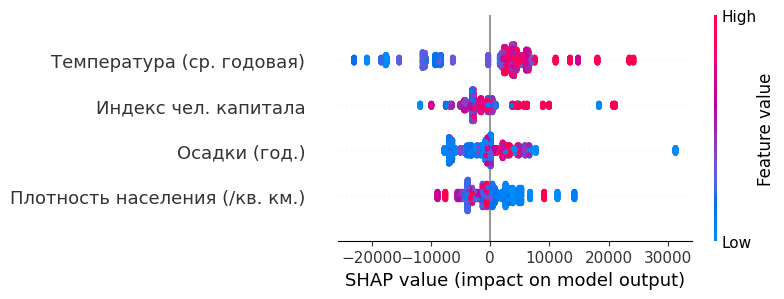

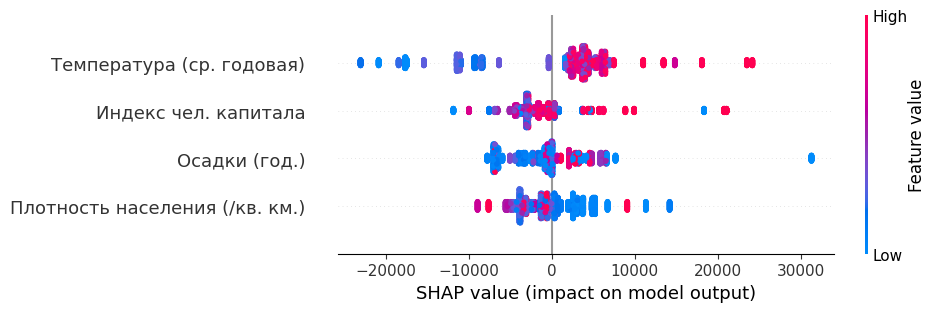

SHAP values для целевой переменной: Громкость


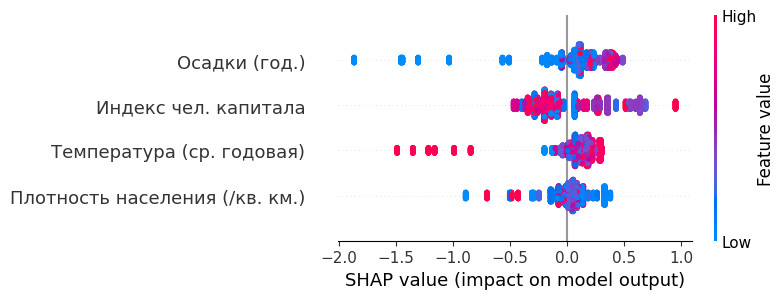

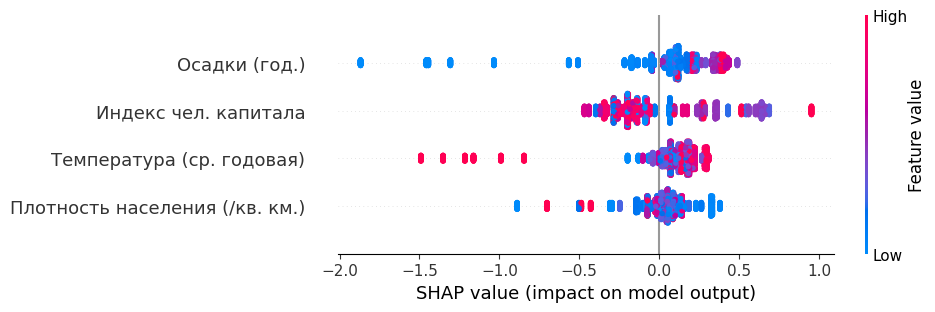

SHAP values для целевой переменной: Энергичность


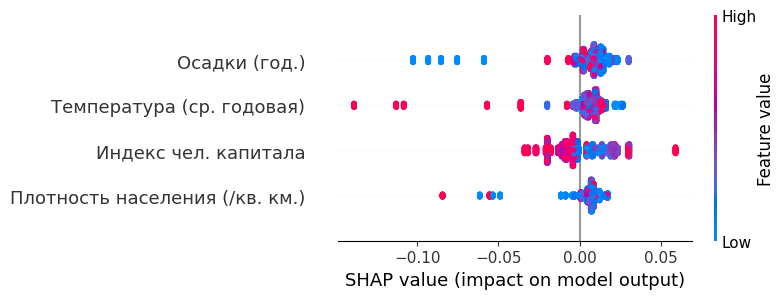

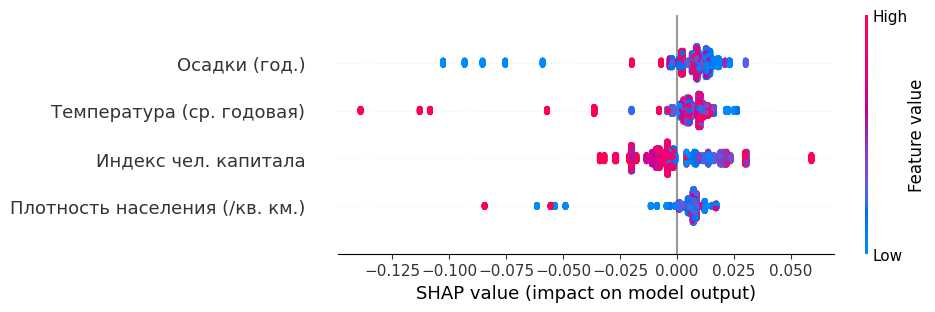

SHAP values для целевой переменной: Танцевальность


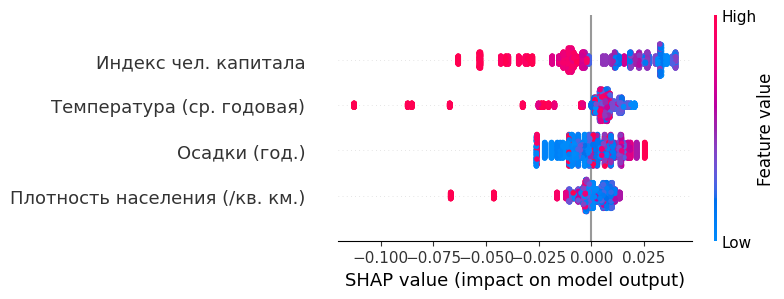

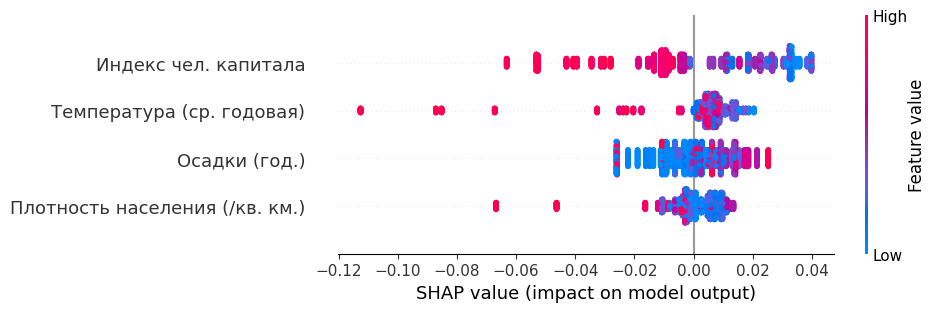

SHAP values для целевой переменной: Акустичность


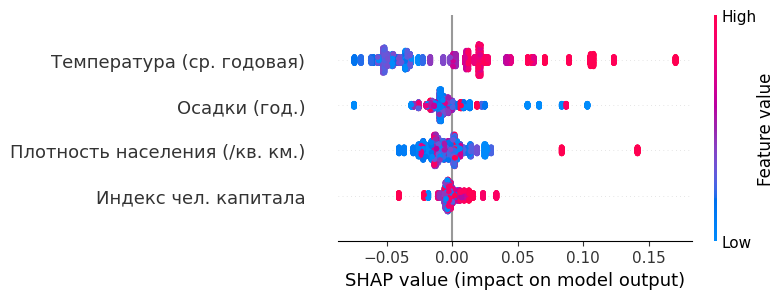

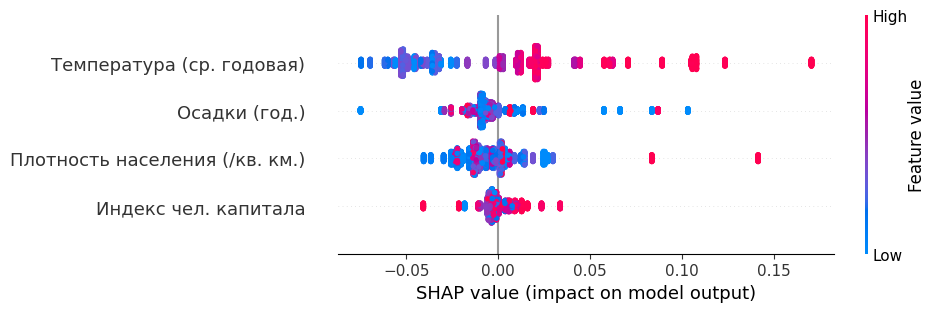

SHAP values для целевой переменной: Инструментальность


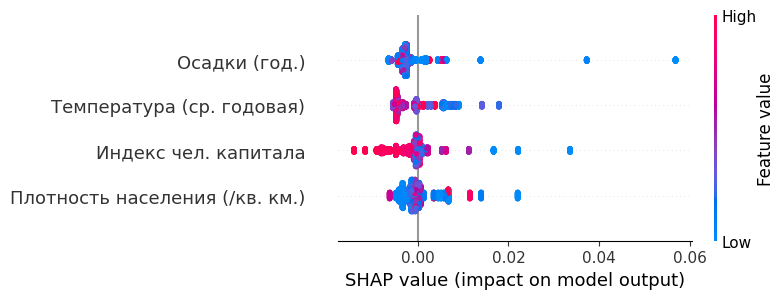

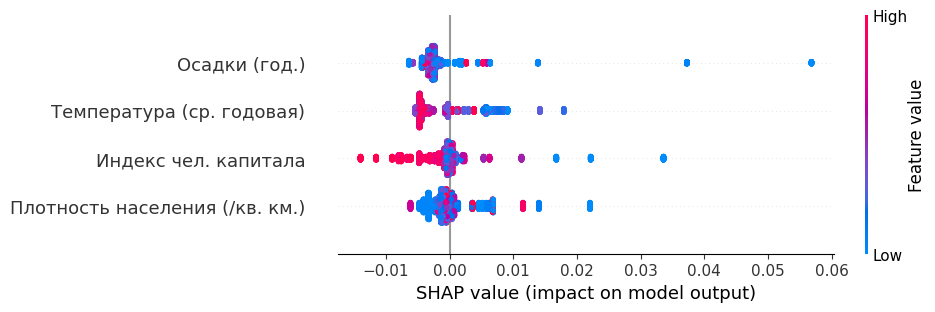

SHAP values для целевой переменной: Живость


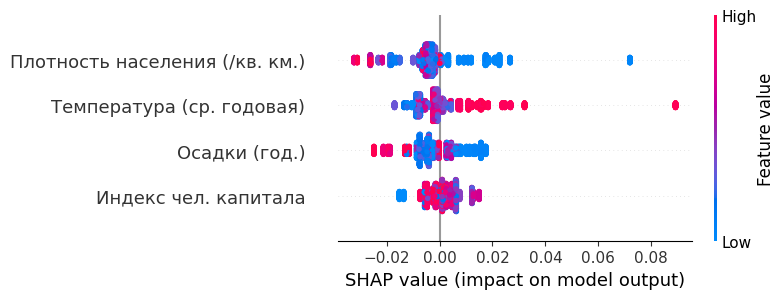

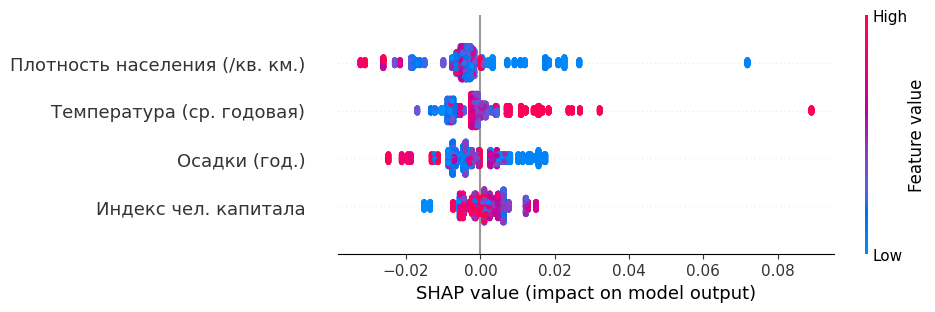

SHAP values для целевой переменной: Валентность


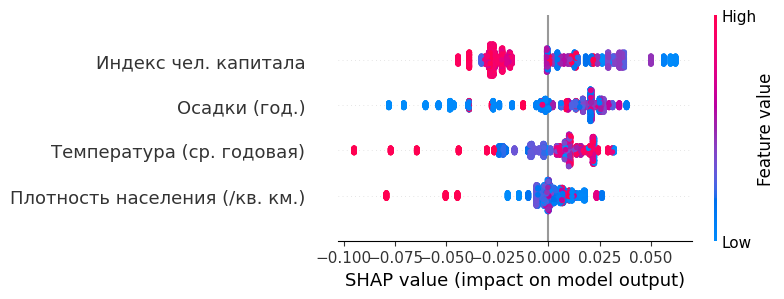

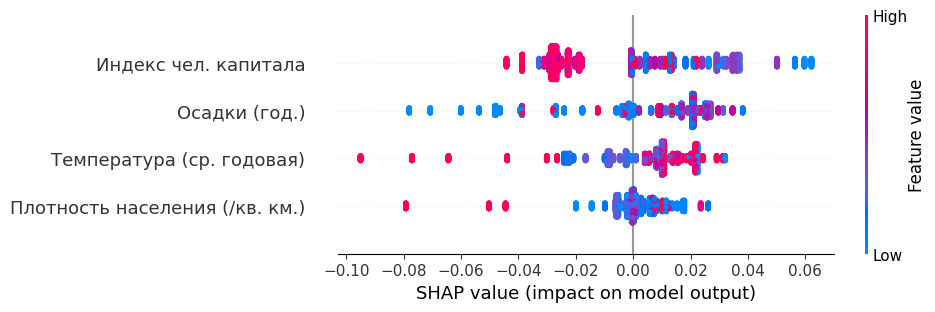

SHAP values для целевой переменной: Речевой контент


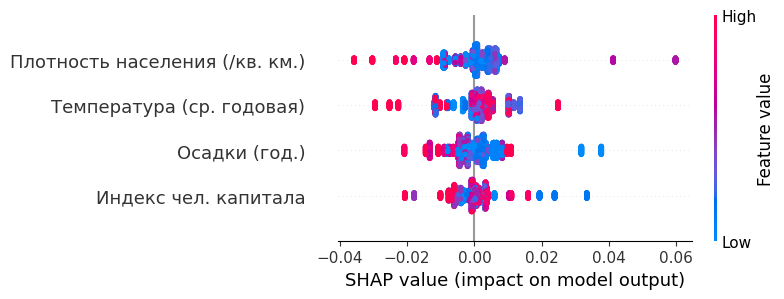

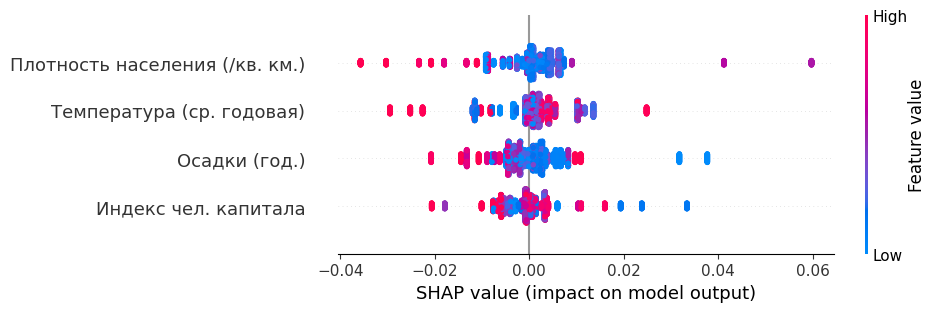

SHAP values для целевой переменной: Темп


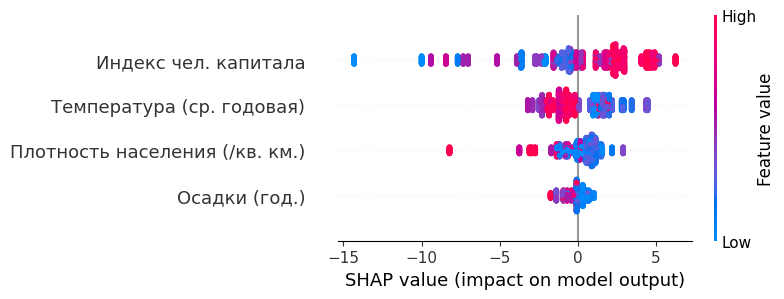

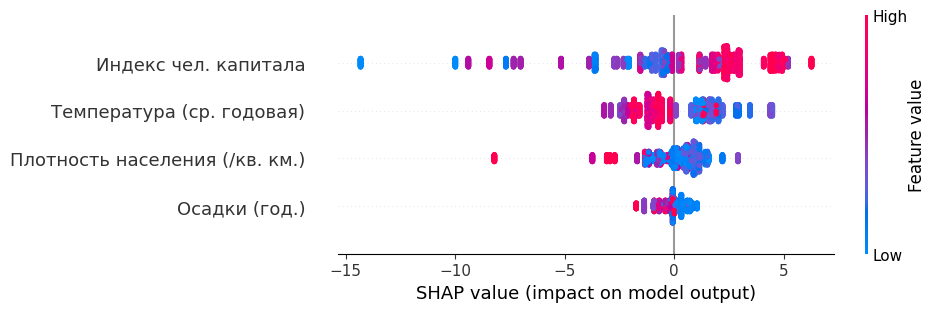

In [16]:

import shap
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

models = []
shap_values_list = []
for i in range(y.shape[1]):
    model = GradientBoostingRegressor(random_state=42)
    model.fit(X_sc, y.iloc[:, i])
    models.append(model)
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_sc)
    
    shap_values_list.append(shap.Explanation(shap_values, base_values=explainer.expected_value, data=X_sc, feature_names=X.columns))

    print(f"SHAP values для целевой переменной: {y.columns[i]}")
    
    shap.summary_plot(shap_values_list[i], features=X, feature_names=X.columns)
    
    shap.plots.beeswarm(shap_values_list[i])
    

